In [18]:
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mushi.utils import prf
from collections import defaultdict
import seaborn as sns
import sklearn
import umap
import tensorly
import tensorly.decomposition

mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"

In [2]:
mask_slicer = slice(0, -10)
t_gen = 29

In [5]:
heatmap_data = []
for i, f in enumerate(glob.glob('output/eta_sweep/*/EUR_CEU/dat*')):
    alpha_params, beta_params, ksfs, population = pickle.load(open(f, 'rb'))
    loss = float(-prf(ksfs.mu.Z, ksfs.X[mask_slicer, :], ksfs.L[mask_slicer, :]))
    heatmap_data.append([alpha_params['alpha_tv'], alpha_params['alpha_spline'], loss, ksfs])

heatmap_data = np.array(heatmap_data)
heatmap_data = heatmap_data[np.lexsort(heatmap_data[:, 1::-1].T)]
# delta loss
heatmap_data[:, 2] = heatmap_data[:, 2] - heatmap_data[0, 2]

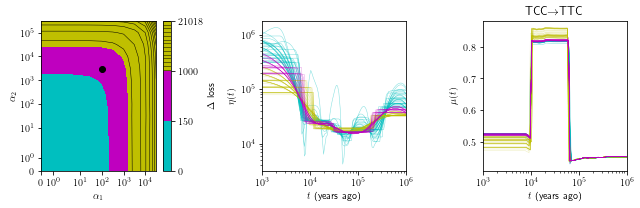

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

plt.sca(axes[0])
x = np.unique(heatmap_data[:, 0])
y = np.unique(heatmap_data[:, 1])
Z = heatmap_data[:, 2].reshape(len(x), len(y)).T
contour = plt.contour(x, y, Z, levels=20, colors='k', linewidths=.5)
heatmap = plt.contourf(contour, levels=[0, 150, 1000, Z.max()], colors=['c', 'm', 'y'])
cbar = fig.colorbar(heatmap)
cbar.ax.set_ylabel(r'$\Delta$ loss')
# Add the contour line levels to the colorbar
cbar.add_lines(contour)
# annotate point used for other sweep
plt.plot(1e2, 3e3, 'ko')
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'$\alpha_1$')
plt.ylabel(r'$\alpha_2$')

for i, data in enumerate(heatmap_data):
    alpha_tv, alpha_spline, relative_loss, ksfs = data
        
    if heatmap.levels[1] <= relative_loss <= heatmap.levels[2]:
        alpha = .9
        zorder = 2
        color = 'm'
        lw = 0.2
    elif relative_loss <= heatmap.levels[1]:
        alpha = .5
        zorder = 1
        color = 'c'
        lw = .5
    else:
        alpha = .25
        zorder = 1
        color = 'y'
        lw = .5

    plt.sca(axes[1])
    ksfs.eta.plot(t_gen=t_gen, alpha=alpha, zorder=zorder, lw=lw, c=color)

    plt.sca(axes[2])
    ksfs.mu.plot(('TCC>TTC', ), t_gen=t_gen, alpha=alpha, zorder=zorder, lw=lw, c=color)

    
plt.sca(axes[1])
plt.xlim([1e3, 1e6])
                 
plt.sca(axes[2])
plt.title(r'TCC$\to$TTC')
plt.xlim([1e3, 1e6])

plt.tight_layout()
plt.savefig('eta_sweep.pdf')

In [7]:
heatmap_data = []
for i, f in enumerate(glob.glob('output/mu_sweep/*/EUR_CEU/dat*')):
    alpha_params, beta_params, ksfs, population = pickle.load(open(f, 'rb'))
    loss = float(-prf(ksfs.mu.Z, ksfs.X[mask_slicer, :], ksfs.L[mask_slicer, :]))
    heatmap_data.append([beta_params['beta_tv'], beta_params['beta_spline'], loss, ksfs])

heatmap_data = np.array(heatmap_data)
heatmap_data = heatmap_data[np.lexsort(heatmap_data[:, 1::-1].T)]
# delta loss
heatmap_data[:, 2] = heatmap_data[:, 2] - heatmap_data[0, 2]

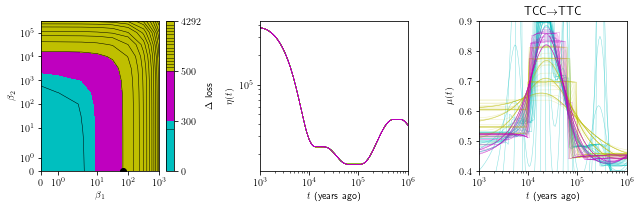

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

plt.sca(axes[0])
x = np.unique(heatmap_data[:, 0])
y = np.unique(heatmap_data[:, 1])
Z = heatmap_data[:, 2].reshape(len(x), len(y)).T
contour = plt.contour(x, y, Z, levels=20, colors='k', linewidths=.5)
heatmap = plt.contourf(contour, levels=[0, 300, 500, Z.max()], colors=['c', 'm', 'y'])
cbar = fig.colorbar(heatmap)
cbar.ax.set_ylabel(r'$\Delta$ loss')
# Add the contour line levels to the colorbar
cbar.add_lines(contour)
# annotate point used for other sweep
plt.plot(7e1, 0, 'ko')
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')

for i, data in enumerate(heatmap_data):
    beta_tv, beta_spline, relative_loss, ksfs = data
        
    if heatmap.levels[1] <= relative_loss <= heatmap.levels[2]:
        alpha = .9
        zorder = 2
        color = 'm'
        lw = 0.2
    elif relative_loss <= heatmap.levels[1]:
        alpha = .5
        zorder = 1
        color = 'c'
        lw = .5
    else:
        alpha = .25
        zorder = 1
        color = 'y'
        lw = .5

    plt.sca(axes[1])
    ksfs.eta.plot(t_gen=t_gen, alpha=alpha, zorder=zorder, lw=lw, c=color)

    plt.sca(axes[2])
    ksfs.mu.plot(('TCC>TTC',), t_gen=t_gen, alpha=alpha, zorder=zorder, lw=lw, c=color)

plt.sca(axes[1])
plt.xlim([1e3, 1e6])
                 
plt.sca(axes[2])
plt.title(r'TCC$\to$TTC')
plt.xlim([1e3, 1e6])
plt.ylim([0.4, 0.9])

plt.tight_layout()
plt.savefig('mu_sweep.pdf')

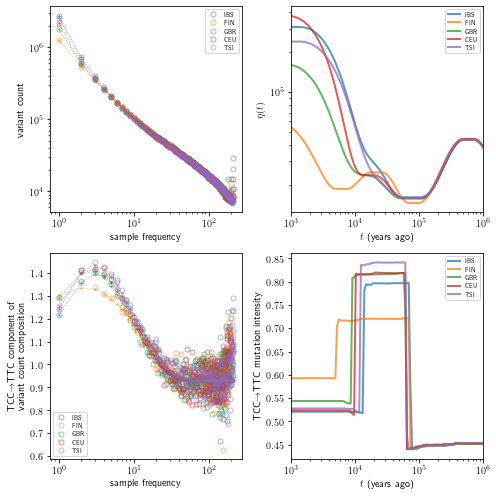

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

files = glob.glob('output/europulse/*/dat.pkl')
for idx, file in enumerate(files):
    pop = file.split('/')[2].split('_')[1]
    alpha_params, beta_params, ksfs, population = pickle.load(open(file, 'rb'))

    plt.sca(axes[0, 0])
    ksfs.plot_total(kwargs=dict(ls='', alpha=0.5, marker='o', ms=5, mfc='none', c=f'C{idx}', label=pop, rasterized=True),
                    line_kwargs=dict(c=f'C{idx}', ls=':', marker='.', ms=3, alpha=0.5, lw=1, rasterized=True),
                    fill_kwargs=dict(color=f'C{idx}', alpha=0))
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(fontsize=6, loc='upper right')
    if idx < len(files) - 1:
        plt.xlabel(None)

    plt.sca(axes[0, 1])
    ksfs.eta.plot(t_gen=t_gen, lw=2, label=pop, alpha=0.75, c=f'C{idx}')
    plt.xlim([1e3, 1e6])
    plt.legend(fontsize=6, loc='upper right')
    if idx < len(files) - 1:
        plt.xlabel(None)

    plt.sca(axes[1, 0])
    ksfs.plot(('TCC>TTC',), clr=True,
              kwargs=dict(ls='', c=f'C{idx}', marker='o', ms=5, mfc='none', alpha=0.5, label=pop, rasterized=True),
              line_kwargs=dict(c=f'C{idx}', ls=':', marker='.', ms=3, alpha=0.5, lw=1, rasterized=True))
    plt.ylabel('TCC$\\to$TTC component of\nvariant count composition')
    plt.legend(fontsize=6)

    plt.sca(axes[1, 1])
    plt.gca().set_prop_cycle(None)
    ksfs.mu.plot(('TCC>TTC',), t_gen=t_gen, clr=False, c=f'C{idx}', alpha=0.75, lw=2, label=pop)
    plt.ylabel('TCC$\\to$TTC mutation intensity')
    plt.xlim([1e3, 1e6])
    plt.legend(fontsize=6)

plt.tight_layout()
plt.savefig('europulse.pdf')

In [ ]:
files = glob.glob('output/mush/*/dat.pkl')

ksfs_dict = {}
pops = defaultdict(list)

for file in files:
    super_pop, pop = file.split('/')[2].split('_')
    alpha_params, beta_params, ksfs, population = pickle.load(open(file, 'rb'))
    pops[super_pop].append(pop)
    ksfs_dict[pop] = ksfs

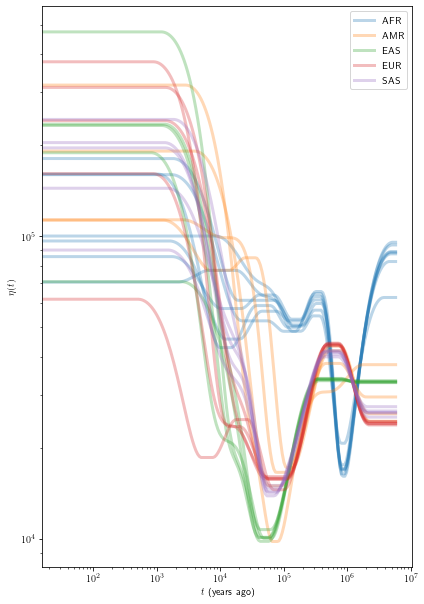

In [20]:
fig = plt.figure(figsize=(6, 1.7 * len(pops)))
for idx_super, super_pop in enumerate(sorted(pops)):
    for idx, pop in enumerate(reversed(pops[super_pop])):
        ksfs_dict[pop].eta.plot(t_gen=t_gen, lw=3, label=super_pop if idx == 0 else None, alpha=0.3, c=f'C{idx_super}')
#         plt.xlim([1e3, 1e6])
plt.legend()
plt.tight_layout()

AFR YRI


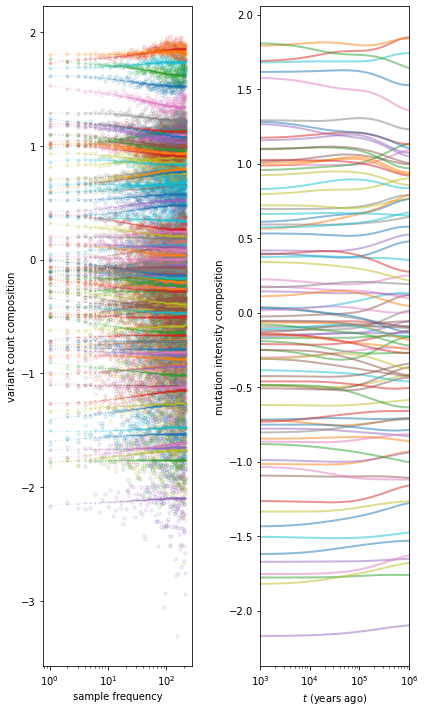

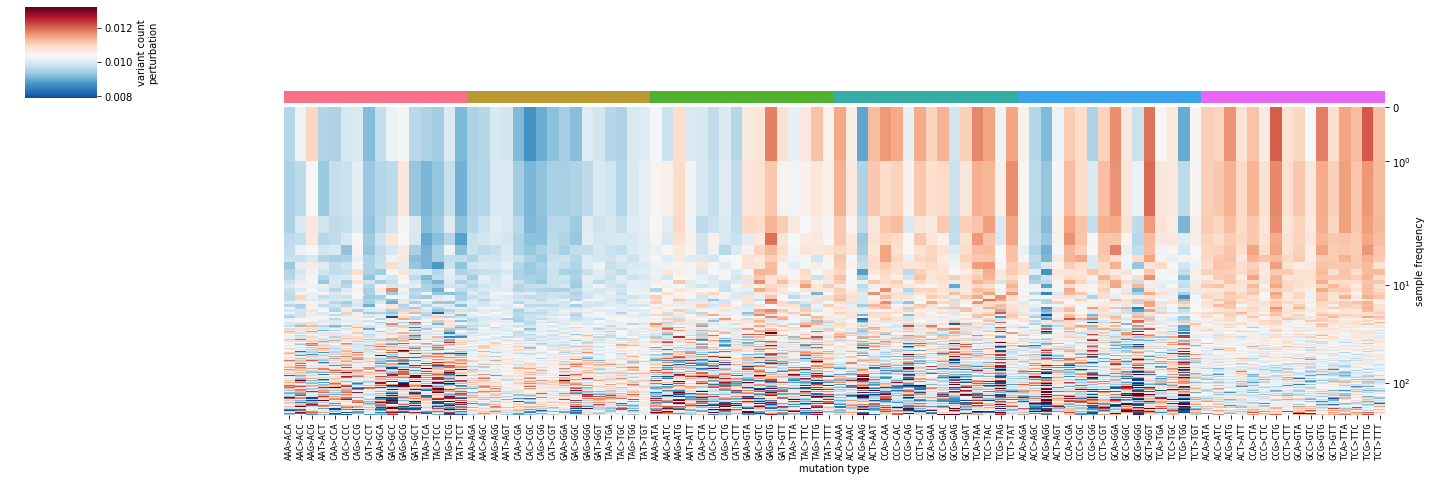

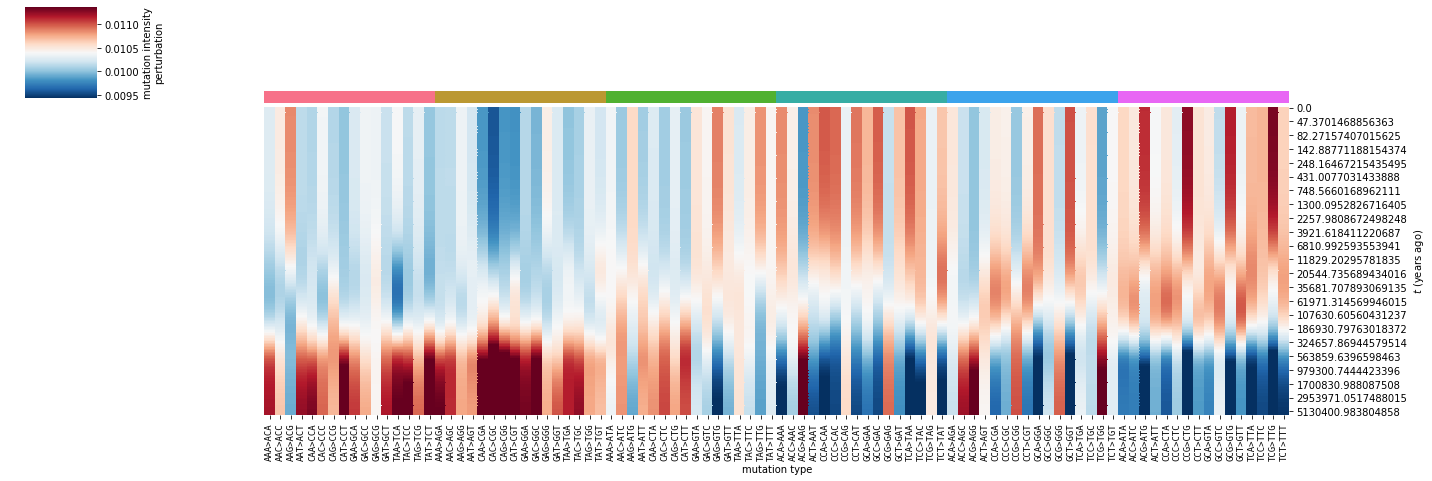

AMR CLM


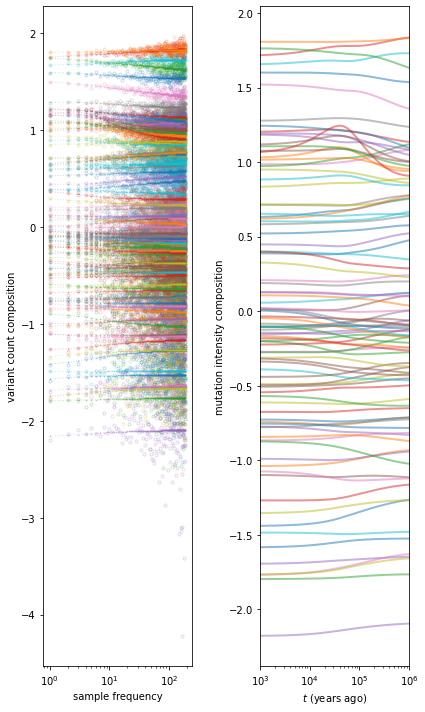

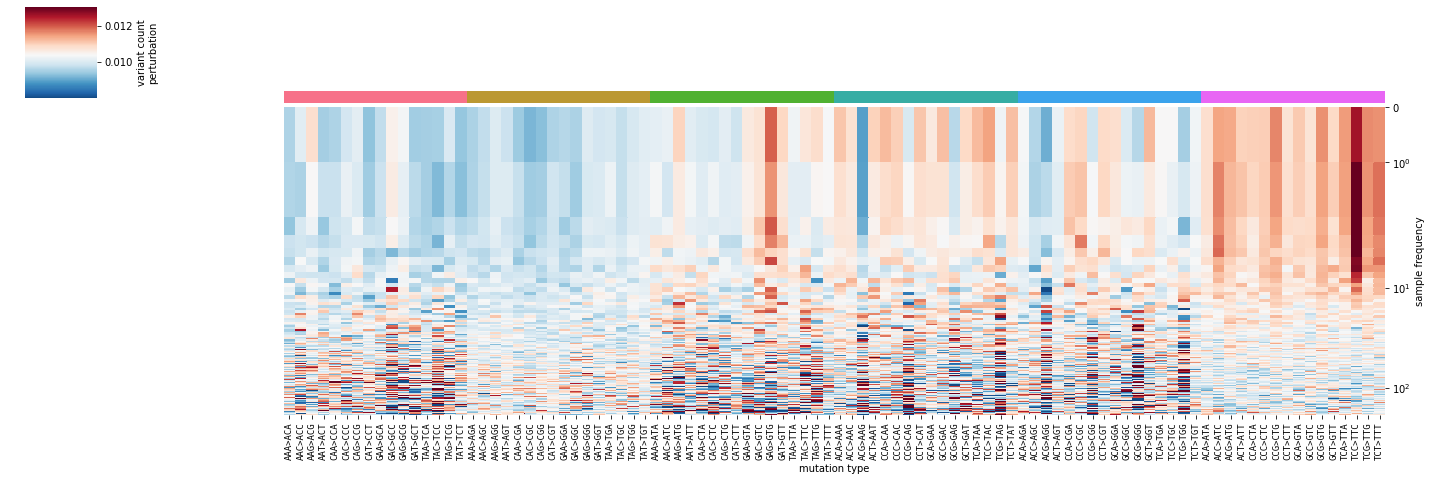

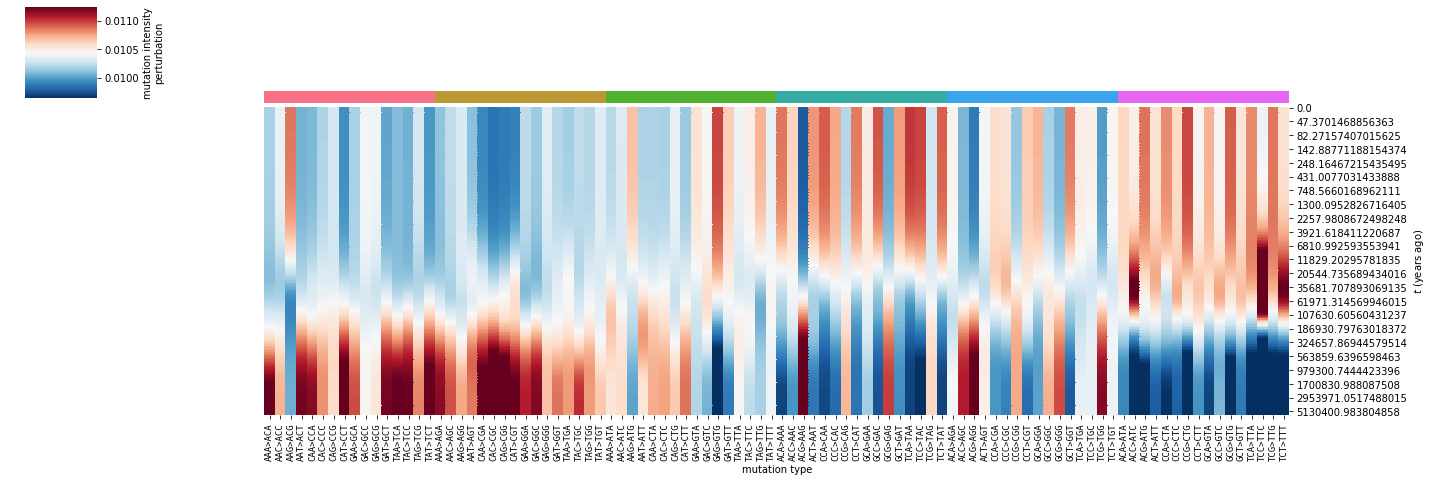

EAS CHS


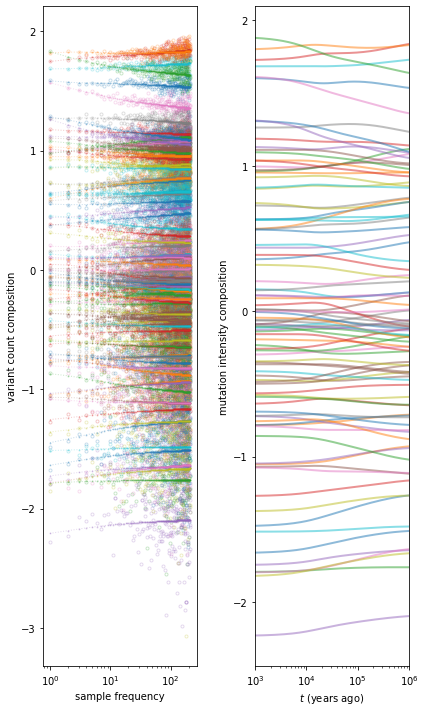

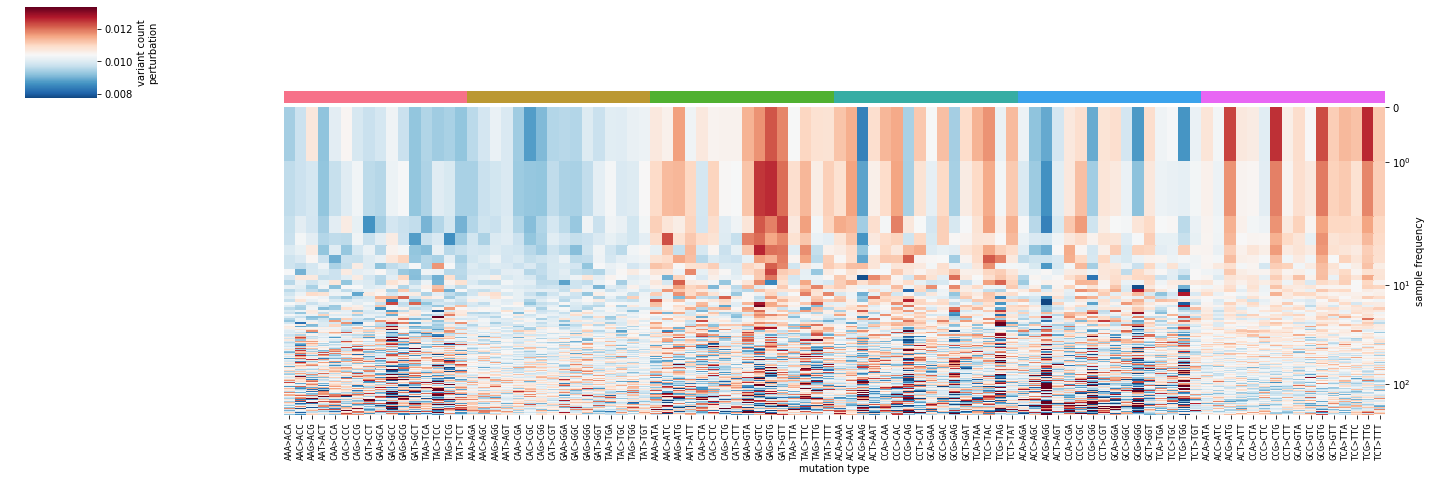

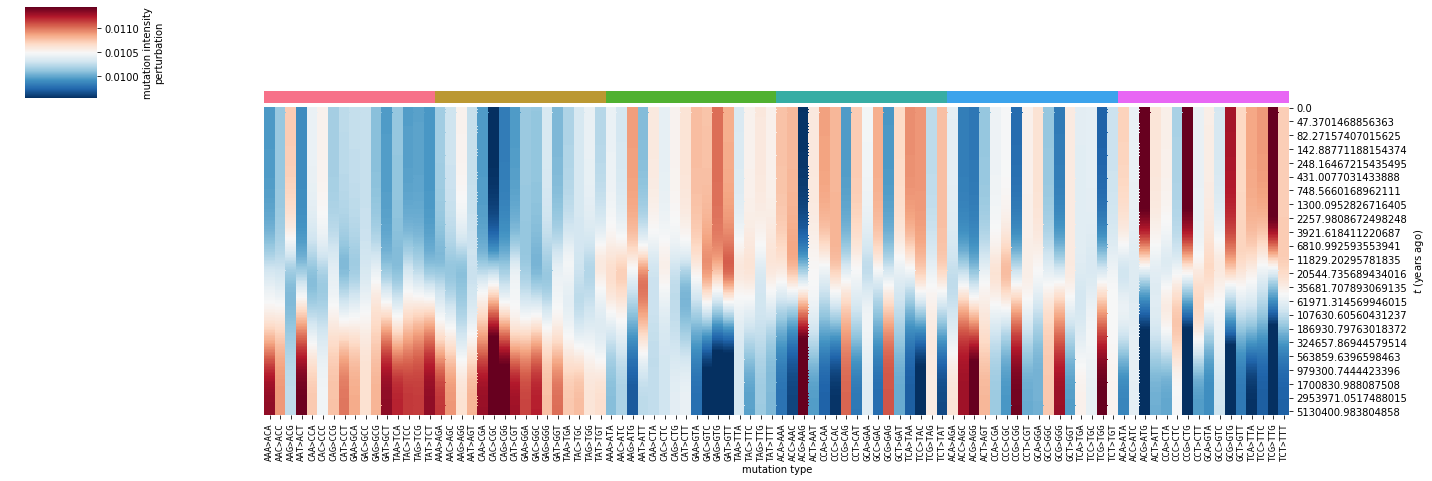

EUR CEU


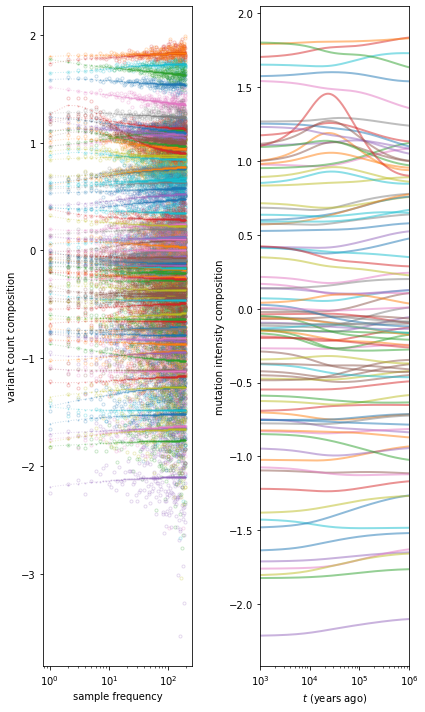

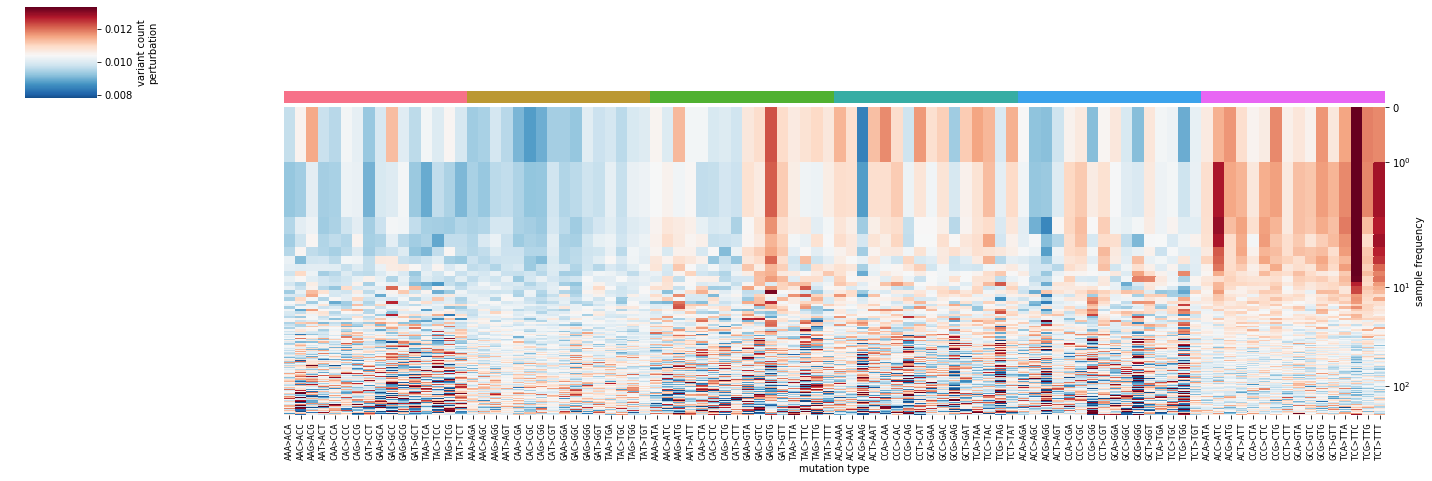

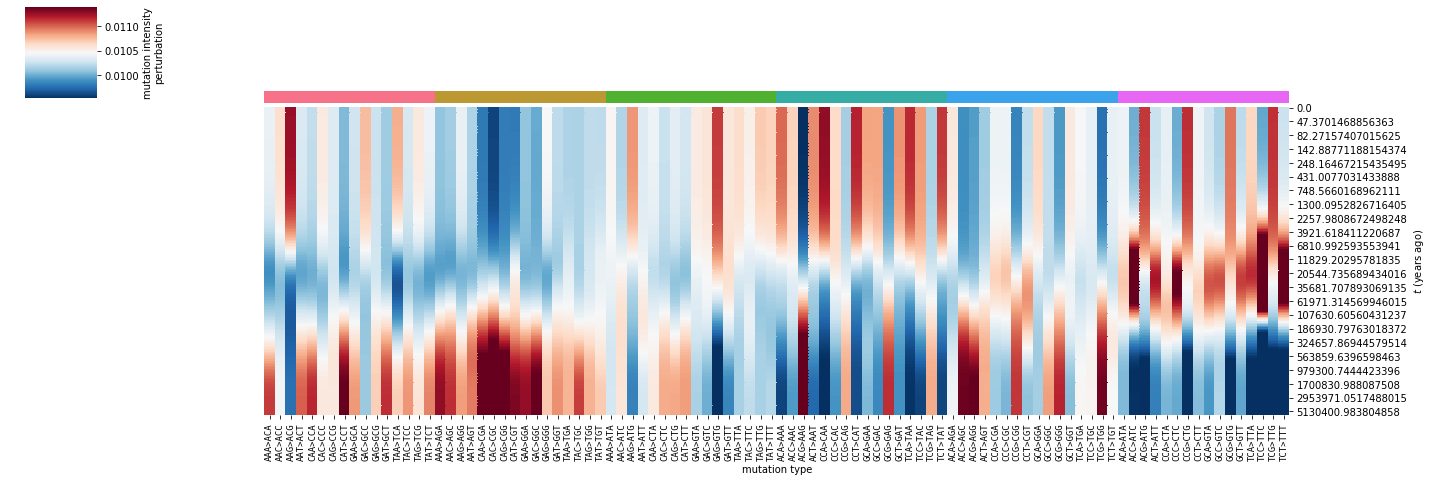

SAS BEB


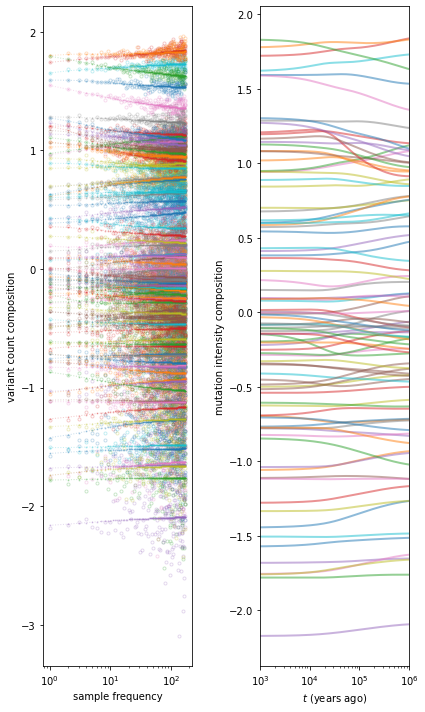

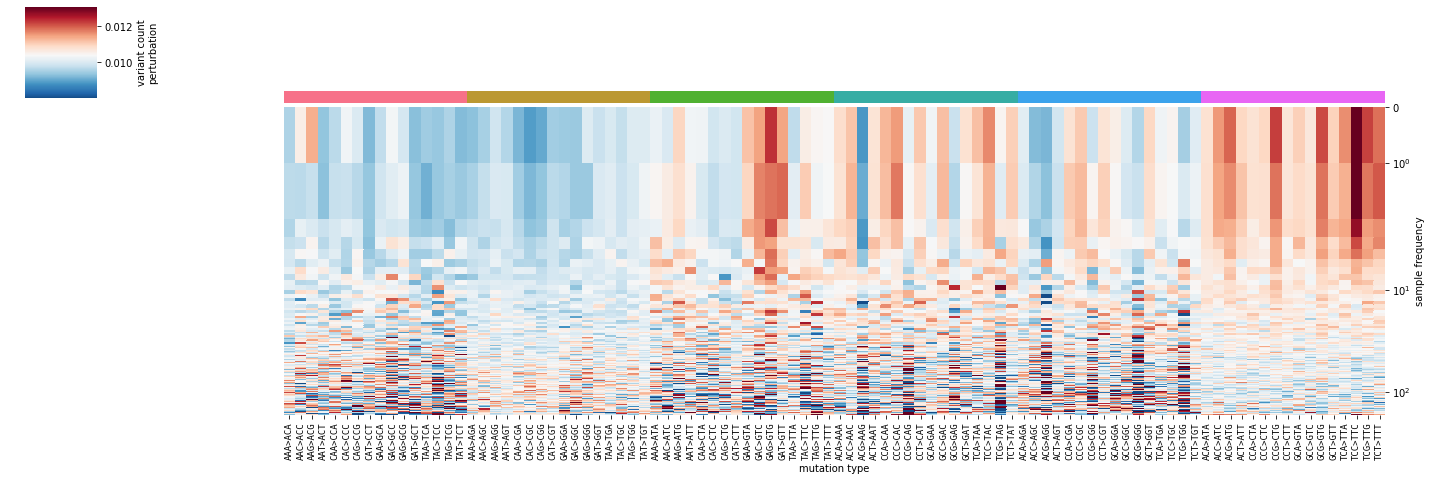

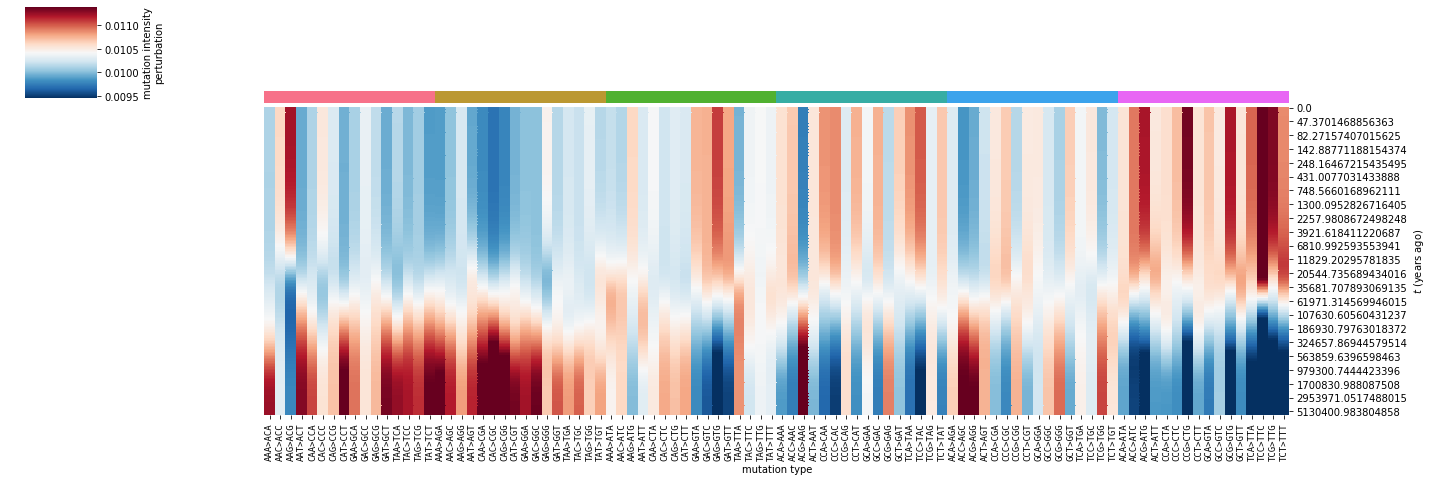

In [16]:
with mpl.rc_context(rc={'text.usetex': False}):
    for idx_super, super_pop in enumerate(sorted(pops)):
        for idx, pop in enumerate(reversed(pops[super_pop])):
            print(super_pop, pop)

            plt.figure(figsize=(6, 10))
            plt.subplot(121)
            ksfs_dict[pop].plot(clr=True, kwargs=dict(alpha=0.25, ls='', marker='o',
                                                      ms=3, mfc='none', rasterized=True),
                                line_kwargs=dict(ls=':', marker='.', ms=2, alpha=0.25,
                                                 lw=1, rasterized=True))
            plt.ylabel('variant count composition')
            plt.subplot(122)
            ksfs_dict[pop].μ.plot(t_gen=t_gen, clr=True, alpha=0.5, lw=2)
            plt.xscale('log')
            plt.ylabel('mutation intensity composition')
            plt.xlim([1e3, 1e6])
            plt.show()

            singlets = [f'{anc}>{der}' for anc, der in zip(ksfs_dict[pop].mutation_types.str[1],
                                                           ksfs_dict[pop].mutation_types.str[5])]

            ksfs_dict[pop].mutation_types.str[1].str.cat(ksfs_dict[pop].mutation_types.str[5], sep='>')

            pal = sns.color_palette('husl', n_colors=6)
            col_map = {'A>C': pal[0], 'A>G': pal[1], 'A>T': pal[2], 'C>A': pal[3], 'C>G': pal[4], 'C>T': pal[5]}
            col_colors = [col_map[singlet] for singlet in singlets]

            ksfs_dict[pop].clustermap(figsize=(20, 7), col_cluster=False,
                                      xticklabels=True, rasterized=True,
                                      robust=True, cmap='RdBu_r',
                                      col_colors=col_colors)
            plt.show()

            ksfs_dict[pop].μ.clustermap(t_gen=t_gen,
                                        figsize=(20, 7), col_cluster=False, xticklabels=True, rasterized=True,
                                        robust=True, cmap='RdBu_r',
                                        col_colors=col_colors)
            plt.show()

            # just first pop from each superpop
            break